In [1]:
%matplotlib notebook

import sys
import os
sys.path.append('{}/code/raspi_thermometer/raspi_thermometer'.format(os.path.expanduser("~")))

from aws_utils import scan
import matplotlib.pyplot as plt
import pandas as pd


%load_ext autoreload
%autoreload 2

In [2]:
data = scan()

In [3]:
data['ResponseMetadata']

{'RequestId': 'STDHDROSPKG3OQG2T74EV9E0URVV4KQNSO5AEMVJF66Q9ASUAAJG',
 'HTTPStatusCode': 200,
 'HTTPHeaders': {'server': 'Server',
  'date': 'Sat, 12 Jan 2019 04:02:12 GMT',
  'content-type': 'application/x-amz-json-1.0',
  'content-length': '1540741',
  'connection': 'keep-alive',
  'x-amzn-requestid': 'STDHDROSPKG3OQG2T74EV9E0URVV4KQNSO5AEMVJF66Q9ASUAAJG',
  'x-amz-crc32': '27461337'},
 'RetryAttempts': 0}

In [4]:
df = pd.DataFrame(data['Items']).sort_values(by=['timestamp']).reset_index(drop=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['temperature'] = df['temperature'].astype(float)

In [5]:
for m in ['temperature','humidity']:
    df['{}_smoothed'.format(m)] = df[m].rolling(30,center=True).mean()

In [6]:
df.tail()

,humidity,temperature,timestamp,temperature_smoothed,humidity_smoothed
16044,67,19.0,2019-01-11 19:52:05.198290,NaN,NaN
16045,69,18.0,2019-01-11 19:54:05.735443,NaN,NaN
16046,70,18.0,2019-01-11 19:56:05.225071,NaN,NaN
16047,71,19.0,2019-01-11 20:01:05.947825,NaN,NaN
16048,69,19.0,2019-01-11 20:02:08.207503,NaN,NaN


<IPython.core.display.Javascript object>


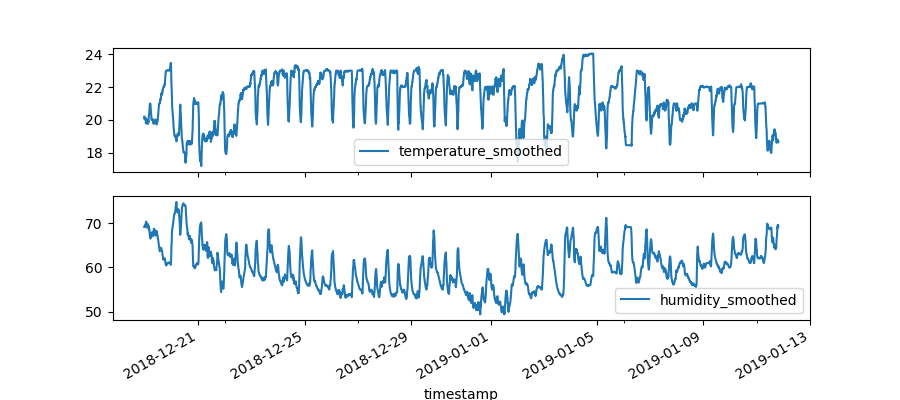

In [7]:
fig,ax=plt.subplots(2,1,figsize=(9,4),sharex=True)
# df.plot(x='timestamp',y='temperature',ax=ax)
df.plot(x='timestamp',y='temperature_smoothed',ax=ax[0])
df.plot(x='timestamp',y='humidity_smoothed',ax=ax[1])

<IPython.core.display.Javascript object>


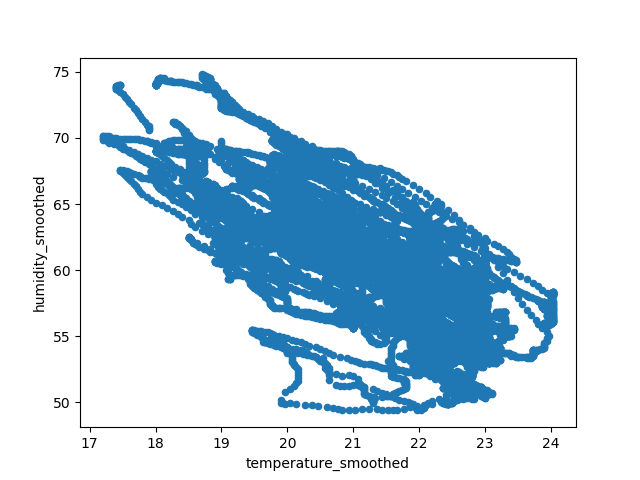

In [8]:
df.plot(x='temperature_smoothed',y='humidity_smoothed',kind='scatter')